# Normalization Analysis Notebook

This notebook provides a step-by-step, cell-organized analysis of the effects of feature normalization on the electricity load dataset. Each section includes both code and visualizations to compare raw and scaled feature distributions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# =============================
# Load Dataset
# =============================

# Choose ONE of the two options below:

# Option 1 — Load cleaned dataset (recommended)
df = pd.read_pickle("/Users/abhetu/Downloads/CS4347_ElectricityLoadProject/data/cleaned_data.pkl")

# Option 2 — Load raw CSV instead
# df = pd.read_csv("/Users/abhetu/Downloads/CS4347_ElectricityLoadProject/data/electricity.csv")

print("[✓] Dataset loaded successfully!")
df.head()


[✓] Dataset loaded successfully!


,id_series,date,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,...,value_311,value_312,value_313,value_314,value_315,time_step,hour,day,month,weekday
0,0,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,1,6
1,0,2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,...,15.645372,12.873025,504.828797,63.439065,761.730205,1,0,1,1,6
2,0,2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,...,15.645372,13.458163,525.021949,60.100167,702.346041,2,0,1,1,6
3,0,2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,...,15.645372,10.532475,526.777875,56.761269,696.480938,3,0,1,1,6
4,0,2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,...,15.645372,14.628438,539.947322,63.439065,693.548387,4,1,1,1,6


In [4]:
# =============================
# Select Features for Normalization Analysis
# =============================

# These are the three representative features used in your report
# (one target + two highly skewed predictors)
features = ["value_0", "value_47", "value_116"]

print("Selected features:", features)


Selected features: ['value_0', 'value_47', 'value_116']


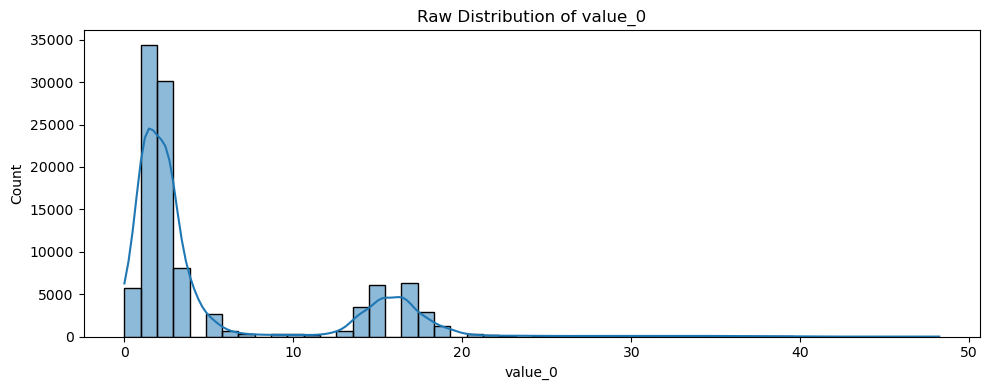

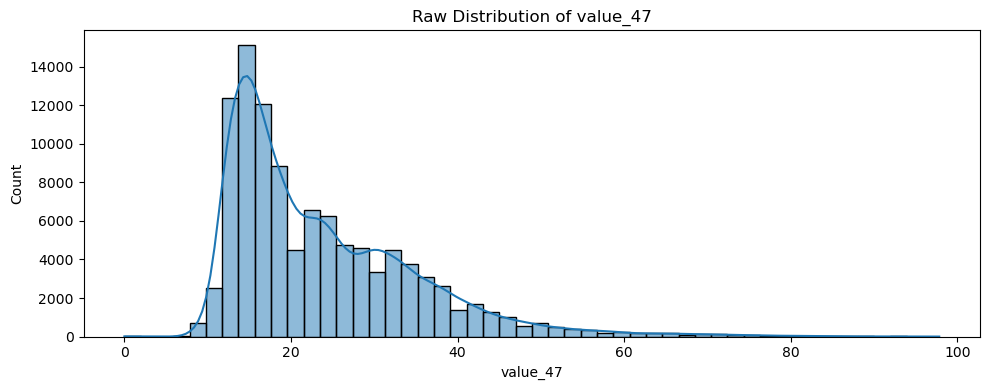

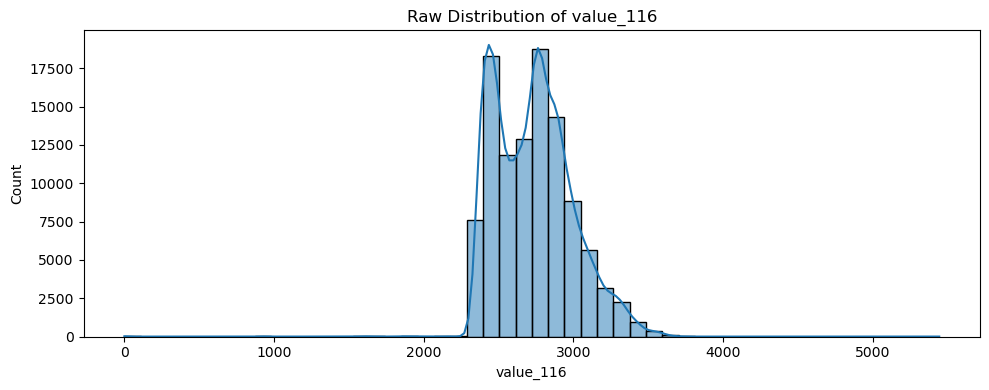

In [5]:
# =============================
# Raw Distribution Histograms
# =============================

for f in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[f], bins=50, kde=True)
    plt.title(f"Raw Distribution of {f}")
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [6]:
# =============================
# Apply StandardScaler
# =============================

scaler = StandardScaler()

# Fit scaler on the selected features and transform them
scaled = scaler.fit_transform(df[features])

# Create a new DataFrame for the scaled features
scaled_df = pd.DataFrame(scaled, columns=[f + "_scaled" for f in features])

# Combine raw + scaled for comparison
combined = pd.concat([df[features], scaled_df], axis=1)

print("[✓] Scaling complete.")
combined.head()


[✓] Scaling complete.


,value_0,value_47,value_116,value_0_scaled,value_47_scaled,value_116_scaled
0,0.000000,0.000000,0.000000,-0.829354,-2.098460,-10.469205
1,3.807107,80.363382,2653.658537,-0.232836,5.027733,-0.308003
2,5.076142,73.375262,2643.902439,-0.033997,4.408064,-0.345360
3,3.807107,68.483578,2653.658537,-0.232836,3.974296,-0.308003
4,3.807107,67.085954,2643.902439,-0.232836,3.850362,-0.345360


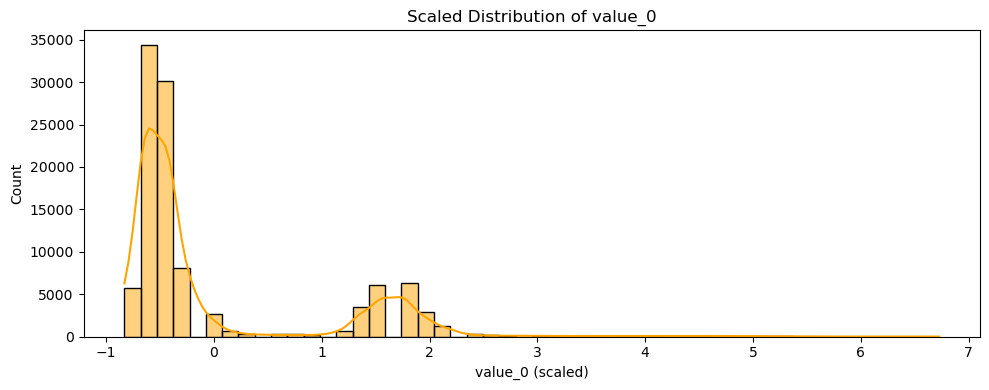

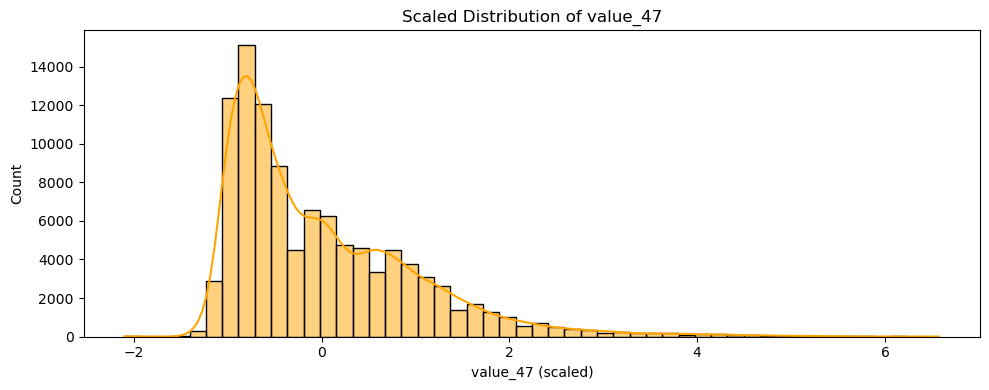

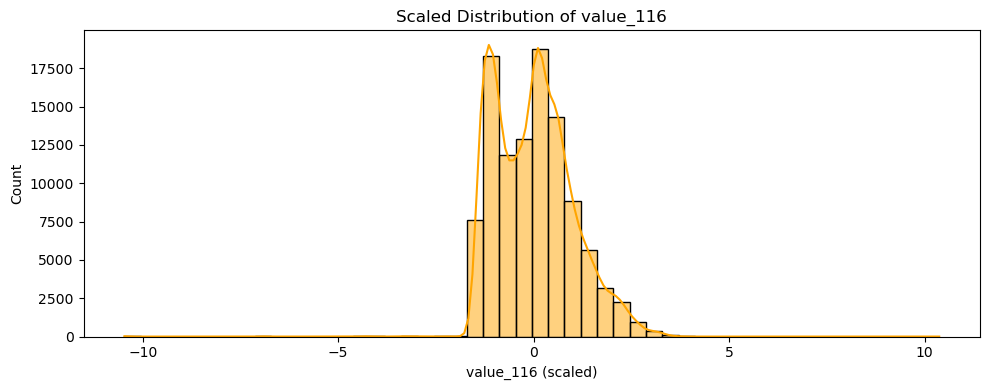

In [7]:
# =============================
# Scaled Distribution Histograms
# =============================

for f in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(combined[f + "_scaled"], bins=50, kde=True, color="orange")
    plt.title(f"Scaled Distribution of {f}")
    plt.xlabel(f + " (scaled)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

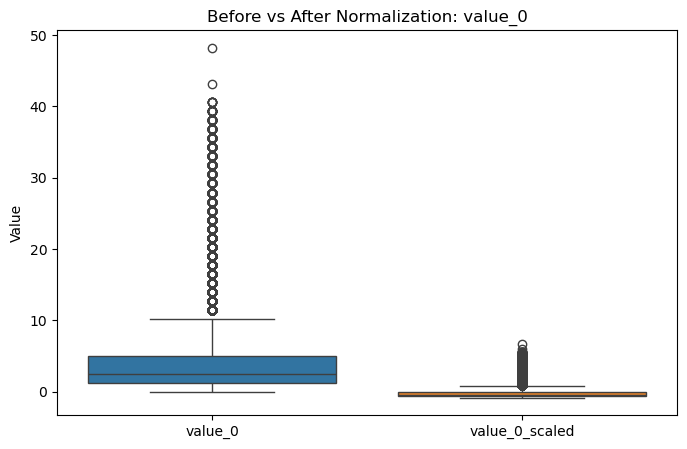

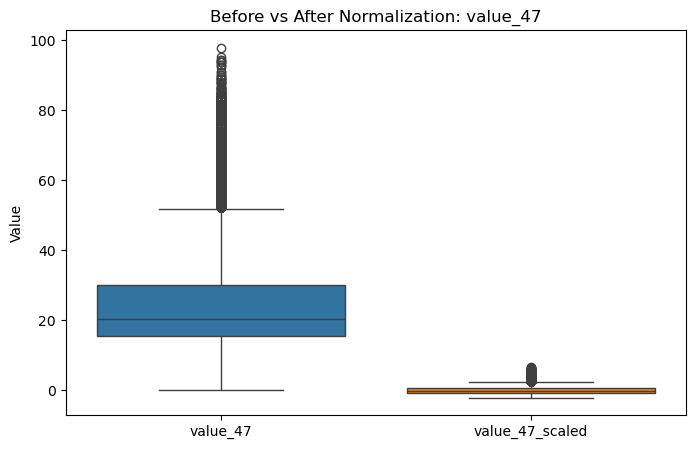

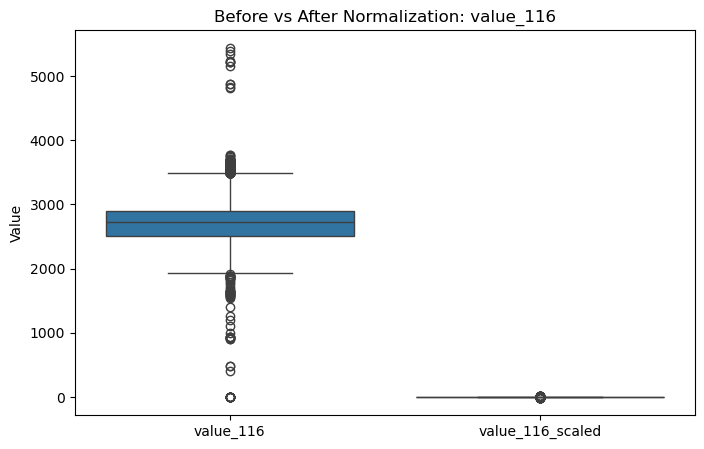

In [8]:
# =============================
# Side-by-Side Boxplots
# =============================

for f in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined[[f, f + "_scaled"]])
    plt.title(f"Before vs After Normalization: {f}")
    plt.ylabel("Value")
    plt.show()


In [9]:
# =============================
# Summary Statistics (Raw vs Scaled)
# =============================

summary = pd.DataFrame()

for f in features:
    raw_stats = df[f].describe()[["mean", "std", "min", "max"]]
    scaled_stats = combined[f + "_scaled"].describe()[["mean", "std", "min", "max"]]

    temp = pd.DataFrame({
        "Feature": f,
        "Raw Mean": raw_stats["mean"],
        "Raw Std": raw_stats["std"],
        "Raw Min": raw_stats["min"],
        "Raw Max": raw_stats["max"],
        "Scaled Mean": scaled_stats["mean"],
        "Scaled Std": scaled_stats["std"],
        "Scaled Min": scaled_stats["min"],
        "Scaled Max": scaled_stats["max"]
    }, index=[0])

    summary = pd.concat([summary, temp], ignore_index=True)

summary


,Feature,Raw Mean,Raw Std,Raw Min,Raw Max,Scaled Mean,Scaled Std,Scaled Min,Scaled Max
0,value_0,5.293122,6.382257,0.0,48.223350,-2.506757e-16,1.000005,-0.829354,6.726529
1,value_47,23.664713,11.277237,0.0,97.833683,-1.037279e-16,1.000005,-2.098460,6.576905
2,value_116,2734.095228,261.157208,0.0,5443.902439,-6.482993e-16,1.000005,-10.469205,10.376203


[✓] id_series found — generating per-user-type distribution plots...


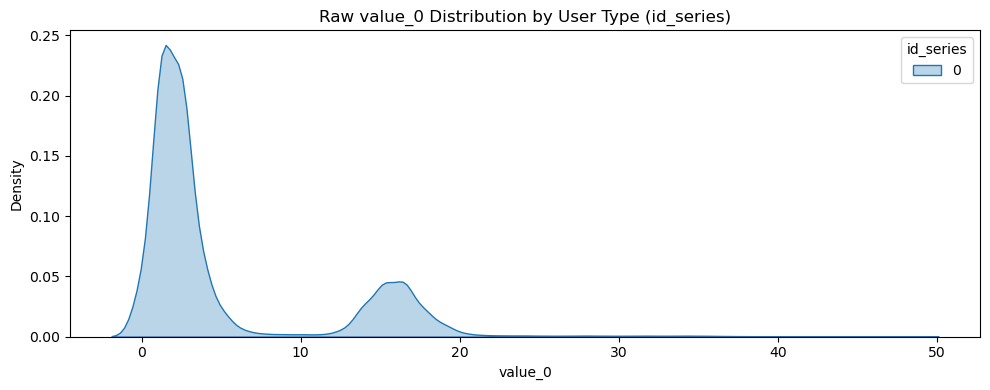

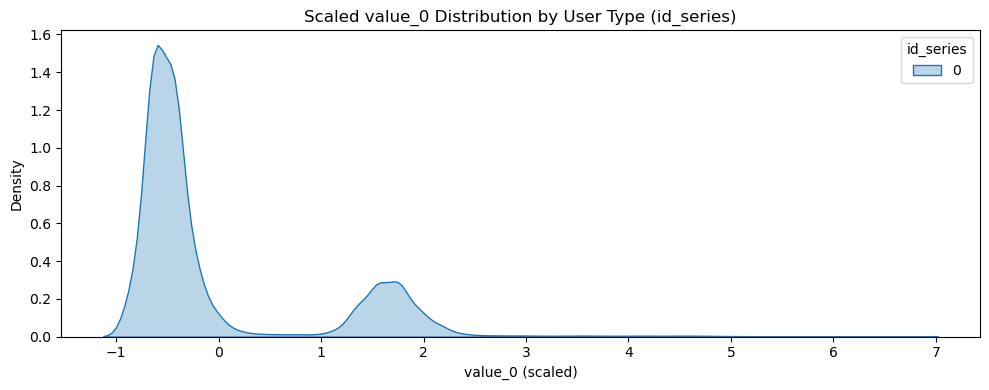

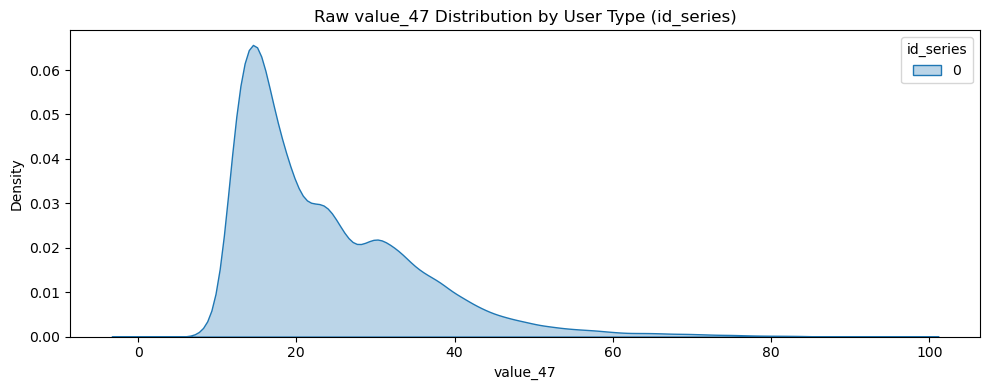

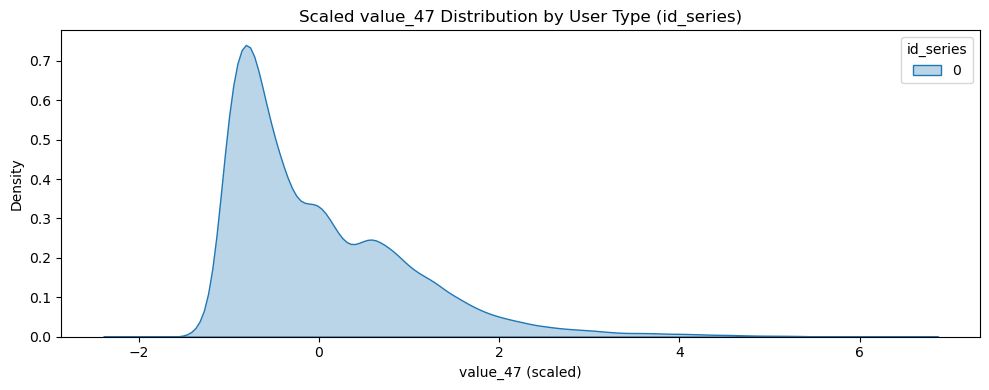

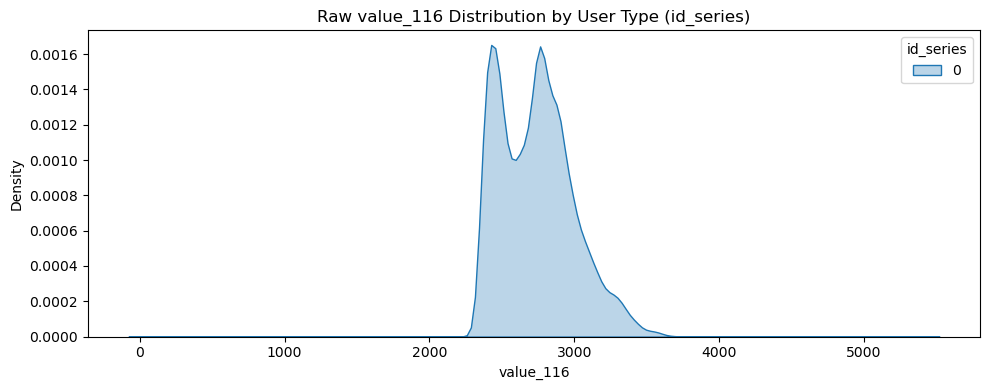

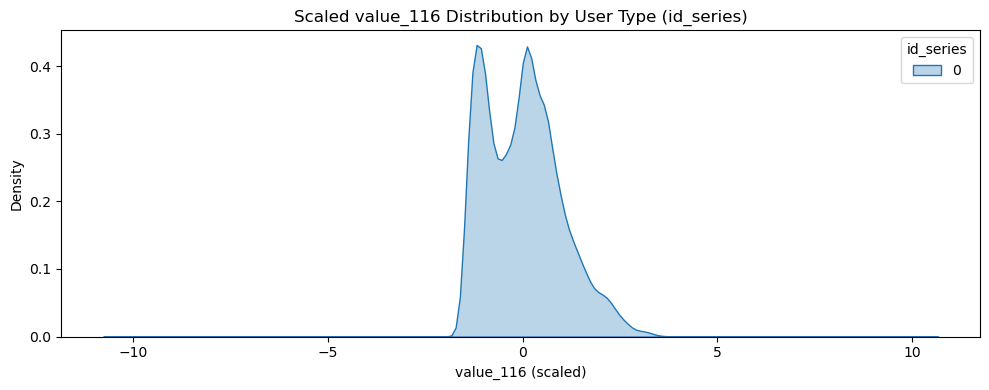

In [11]:
# =============================
# Per-User-Type Distribution (Before vs After)
# =============================

if "id_series" in df.columns:
    print("[✓] id_series found — generating per-user-type distribution plots...")

    for f in features:
        # Raw distributions grouped by user type
        plt.figure(figsize=(10, 4))
        sns.kdeplot(data=df, x=f, hue="id_series", common_norm=False, fill=True, alpha=0.3)
        plt.title(f"Raw {f} Distribution by User Type (id_series)")
        plt.xlabel(f)
        plt.tight_layout()
        plt.show()

        # Scaled distributions grouped by user type
        plt.figure(figsize=(10, 4))
        sns.kdeplot(data=combined, x=f + "_scaled", hue=df["id_series"], common_norm=False, fill=True, alpha=0.3)
        plt.title(f"Scaled {f} Distribution by User Type (id_series)")
        plt.xlabel(f + " (scaled)")
        plt.tight_layout()
        plt.show()

else:
    print("[!] id_series not found — skipping user-type normalization analysis.")


Normalization analysis complete. All visualizations and summary tables generated successfully.
